<center> <h1 style="background-color:orange; color:white"><br>Exploratory Data Analysis<br></h1></center>

# `Problem Statement:`
We have used Cars dataset from kaggle  with features including make, model, year, engine, and other properties of the car used to predict its price.

## `Importing the necessary libraries`





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## `Load the dataset into dataframe`

In [2]:
## load the csv file 
df = pd.read_csv('Cars_data.csv')

In [3]:
## print the head of the dataframe

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now we observe the each features present in the dataset.<br>

 `Make:` The Make feature is the company name of the Car.<br>
`Model:` The Model feature is the model or different version of Car models.<br>
`Year:`  The year describes the model has been launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` It's say the Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` It define the nos of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.







## `Check the datatypes`

In [8]:
# Get the datatypes of each columns number of records in each column.
# df.info()
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## `Dropping irrevalent columns`

If we consider all columns present in the dataset then unneccessary columns will impact on the model's accuracy.<br>
Not all the columns are important to us in the given dataframe, and hence we would drop the columns that are irrevalent to us. It would reflect our model's accucary so we need to drop them. Otherwise it will affect our model.


The list cols_to_drop contains the names of the cols that are irrevalent, drop all these cols from the dataframe.


`cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]`

These features are not neccessary to obtain the model's accucary. It does not contain any relevant information in the dataset. 

In [9]:
# initialise cols_to_drop
cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]


In [10]:
# drop the irrevalent cols and print the head of the dataframe
df.drop(cols_to_drop,axis=1,inplace=True)

# print df head

df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## `Renaming the columns`

Now, Its time for renaming the feature to useful feature name. It will help to use them in model training purpose.<br>

We have already dropped the unneccesary columns, and now we are left with useful columns. One extra thing that we would do is to rename the columns such that the name clearly represents the essence of the column.

The given dict represents (in key value pair) the previous name, and the new name for the dataframe columns

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [11]:
# rename cols 
rename_cols = {'Make':'Brand','Model':'CarModel','Year':'ManufactureYear','Engine HP':'Horsepower',
                'Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Type',
               'highway MPG': 'Highway Mileage','city mpg': 'City Mileage','MSRP': 'Price'
              }


In [12]:
# use a pandas function to rename the current columns - 
df.rename(columns=rename_cols,inplace = True)


In [13]:
# Print the head of the dataframe

df.head()

,Brand,CarModel,ManufactureYear,Horsepower,Cylinders,Transmission,Drive Type,Highway Mileage,City Mileage,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## `Dropping the duplicate rows`

There are many rows in the dataframe which are duplicate, and hence they are just repeating the information. Its better if we remove these rows as they don't add any value to the dataframe. 

For given data, we would like to see how many rows were duplicates. For this, we will count the number of rows, remove the dublicated rows, and again count the number of rows.

In [14]:
# number of rows before removing duplicated rows
df.duplicated().sum()
# df[df.duplicated()]

989

In [15]:
# drop the duplicated rows
df=df.drop_duplicates()

# print head of df

df.head(3)

,Brand,CarModel,ManufactureYear,Horsepower,Cylinders,Transmission,Drive Type,Highway Mileage,City Mileage,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350


In [16]:
# Count Number of rows after deleting duplicated rows

df.duplicated().sum()

0

## `Dropping the null or missing values`

Missing values are usually represented in the form of Nan or null or None in the dataset.

Finding whether we have null values in the data is by using the isnull() function.

There are many values which are missing, in pandas dataframe these values are reffered to as np.nan. We want to deal with these values beause we can't use nan values to train models. Either we can remove them to apply some strategy to replace them with other values.

To keep things simple we will be dropping nan values

In [17]:
# check for nan values in each columns

df.isna().sum()


Brand               0
CarModel            0
ManufactureYear     0
Horsepower         69
Cylinders          30
Transmission        0
Drive Type          0
Highway Mileage     0
City Mileage        0
Price               0
dtype: int64

As we can see that the HP and Cylinders have null values of 69 and 30. As these null values will impact on models' accuracy. So to avoid the impact we will drop the these values. As these values are small camparing with dataset  that will not impact any major affect on model accuracy so we will drop the values.

In [21]:
# drop missing values
df = df.dropna(subset=['Horsepower', 'Cylinders'])
  

In [22]:
# Make sure that missing values are removed
# check number of nan values in each col again
df.isna().sum()


Brand              0
CarModel           0
ManufactureYear    0
Horsepower         0
Cylinders          0
Transmission       0
Drive Type         0
Highway Mileage    0
City Mileage       0
Price              0
dtype: int64

In [23]:
#Describe statistics of df

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ManufactureYear,10827.0,2010.896370,7.029534,1990.0,2007.0,2015.0,2016.0,2017.0
Horsepower,10827.0,254.553062,109.841537,55.0,173.0,240.0,303.0,1001.0
Cylinders,10827.0,5.691604,1.768551,0.0,4.0,6.0,6.0,16.0
Highway Mileage,10827.0,26.308119,7.504652,12.0,22.0,25.0,30.0,354.0
City Mileage,10827.0,19.327607,6.643567,7.0,16.0,18.0,22.0,137.0
Price,10827.0,42493.254272,62294.505067,2000.0,21972.5,30845.0,43300.0,2065902.0


## `Removing outliers`

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

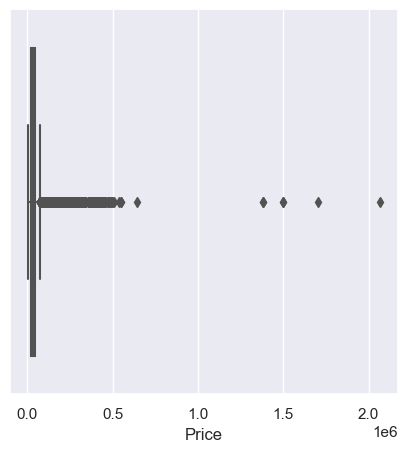

In [24]:
## Plot a boxplot for 'Price' column in dataset. 
plt.figure(figsize=(5,5))
sns.boxplot(x='Price',data=df,color='r')
plt.show()


### **`Observation:`**<br>

Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values.
Now we have detect the outliers of the feature of Price. Similarly we will checking of anothers features.

In [25]:
df.columns

Index(['Brand', 'CarModel', 'ManufactureYear', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive Type', 'Highway Mileage', 'City Mileage',
       'Price'],
      dtype='object')

<Axes: xlabel='Horsepower'>

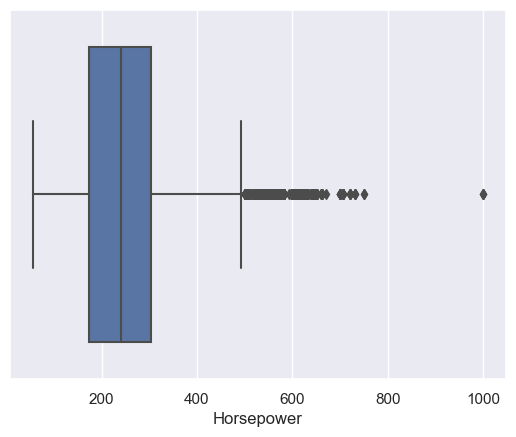

In [26]:
## PLot a boxplot for 'HP' columns in dataset

sns.boxplot(x='Horsepower',data=df)

### **`Observation:`**<br>
Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

In [21]:
# num_col = df.select_dtypes(include=['int64,float64'])

print all the columns which are of int or float datatype in df. 

Hint: Use loc with condition

In [27]:
# Select numeric columns using loc with condition
numeric_columns = df.loc[:, df.dtypes.isin([int, float])]
print(numeric_columns)


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 110, 111, ...]

[10827 rows x 0 columns]


In [28]:
# print all the columns which are of int or float datatype in df.

df.dtypes

Brand               object
CarModel            object
ManufactureYear      int64
Horsepower         float64
Cylinders          float64
Transmission        object
Drive Type          object
Highway Mileage      int64
City Mileage         int64
Price                int64
dtype: object

### `Save the column names of the above output in variable list named 'l'`


In [29]:
# save column names of the above output in variable list
l= numeric_columns.columns.tolist()


## **`Outliers removal techniques - IQR Method`**
 

**Here comes cool Fact for you!**

IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

- Calculate IQR  and give a suitable threshold to remove the outliers and save this new dataframe into df2.

Let us help you to decide threshold: Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or above (Q3 + 1.5x IQR)

In [31]:

# Ensure l contains numeric column names
# l = numeric_columns.columns.tolist()

# Calculate Q1 and Q3 for each numeric column
outliers = []
for col in l:
    Q1 = np.percentile(df[col], 25)  # First quartile
    Q3 = np.percentile(df[col], 75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    low = Q1 - 1.5 * IQR  # Lower bound
    upp = Q3 + 1.5 * IQR  # Upper bound

    # Identify outliers in the column
    outliers_in_col = df[(df[col] < low) | (df[col] > upp)].index.tolist()
    outliers.extend(outliers_in_col)

# Remove duplicate indices from outliers list
outliers = list(set(outliers))

# Define df2 after removing rows with outliers
df2 = df.drop(outliers, axis=0).reset_index(drop=True)

# Display the resulting DataFrame
print(df2)


         Brand    CarModel  ManufactureYear  Horsepower  Cylinders  \
0          BMW  1 Series M             2011       335.0        6.0   
1          BMW    1 Series             2011       300.0        6.0   
2          BMW    1 Series             2011       300.0        6.0   
3          BMW    1 Series             2011       230.0        6.0   
4          BMW    1 Series             2011       230.0        6.0   
...        ...         ...              ...         ...        ...   
10822    Acura         ZDX             2012       300.0        6.0   
10823    Acura         ZDX             2012       300.0        6.0   
10824    Acura         ZDX             2012       300.0        6.0   
10825    Acura         ZDX             2013       300.0        6.0   
10826  Lincoln      Zephyr             2006       221.0        6.0   

      Transmission         Drive Type  Highway Mileage  City Mileage  Price  
0           MANUAL   rear wheel drive               26            19  46135  
1  

In [32]:
# find the shape of df & df2

print('df',df.shape)
print('df2',df2.shape)


df (10827, 10)
df2 (10827, 10)


In [33]:
# find unique values and there counts in each column in df using value counts function.

# for i in df.columns:
#     print ("--------------- %s ----------------" % i)
#     # code here

for col in df.columns:
    print(f"--------------- {col} ----------------")
    print(df[col].value_counts())
    print()  # Adds an empty line for better readability


--------------- Brand ----------------
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo     

## `Visualising Univariate Distributions`

We will use seaborn library to visualize eye catchy univariate plots. 

Do you know? you have just now already explored one univariate plot. guess which one? Yeah its box plot.


### `Histogram & Density Plots`

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

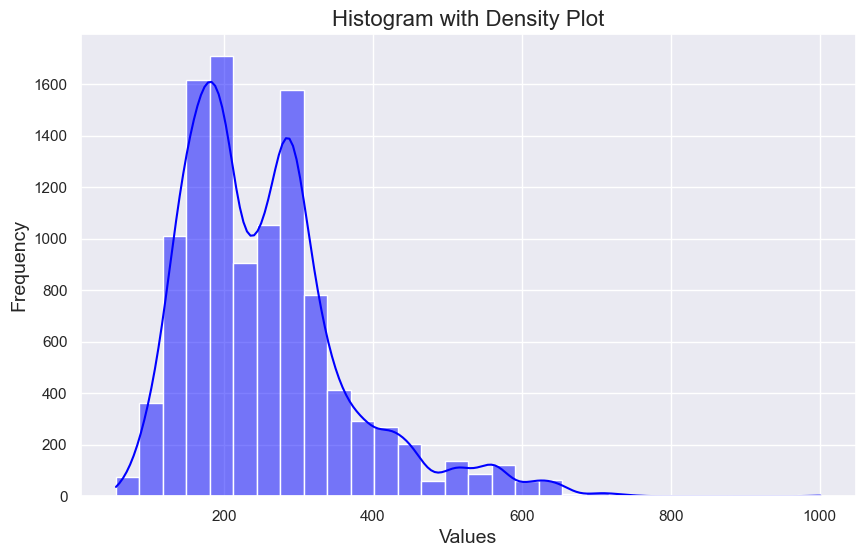

In [34]:
#ploting distplot for variable HP
numeric_column = df['Horsepower']  # Replace 'Price' with any numeric column in your DataFrame

# Plot histogram with density
plt.figure(figsize=(10, 6))
sns.histplot(numeric_column, kde=True, bins=30, color='blue')
plt.title('Histogram with Density Plot', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

### **`Observation:`**
We plot the Histogram of feature HP with help of distplot in seaborn.<br> 
In this graph we can see that there is max values near at 200. similary we have also the 2nd highest value near 400 and so on. <br>
It represents the overall distribution of continuous data variables.<br>

Since seaborn uses matplotlib behind the scenes, the usual matplotlib functions work well with seaborn. For example, you can use subplots to plot multiple univariate distributions.
- Hint: use matplotlib subplot function

In [51]:
l = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(l)  # Check the columns in the list


['ManufactureYear', 'Horsepower', 'Cylinders', 'Highway Mileage', 'City Mileage', 'Price']


In [52]:
for col in l:
    print(df[col].head())  # Display the first few rows of each column


0    2011
1    2011
2    2011
3    2011
4    2011
Name: ManufactureYear, dtype: int64
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: Horsepower, dtype: float64
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: Cylinders, dtype: float64
0    26
1    28
2    28
3    28
4    28
Name: Highway Mileage, dtype: int64
0    19
1    19
2    20
3    18
4    18
Name: City Mileage, dtype: int64
0    46135
1    40650
2    36350
3    29450
4    34500
Name: Price, dtype: int64


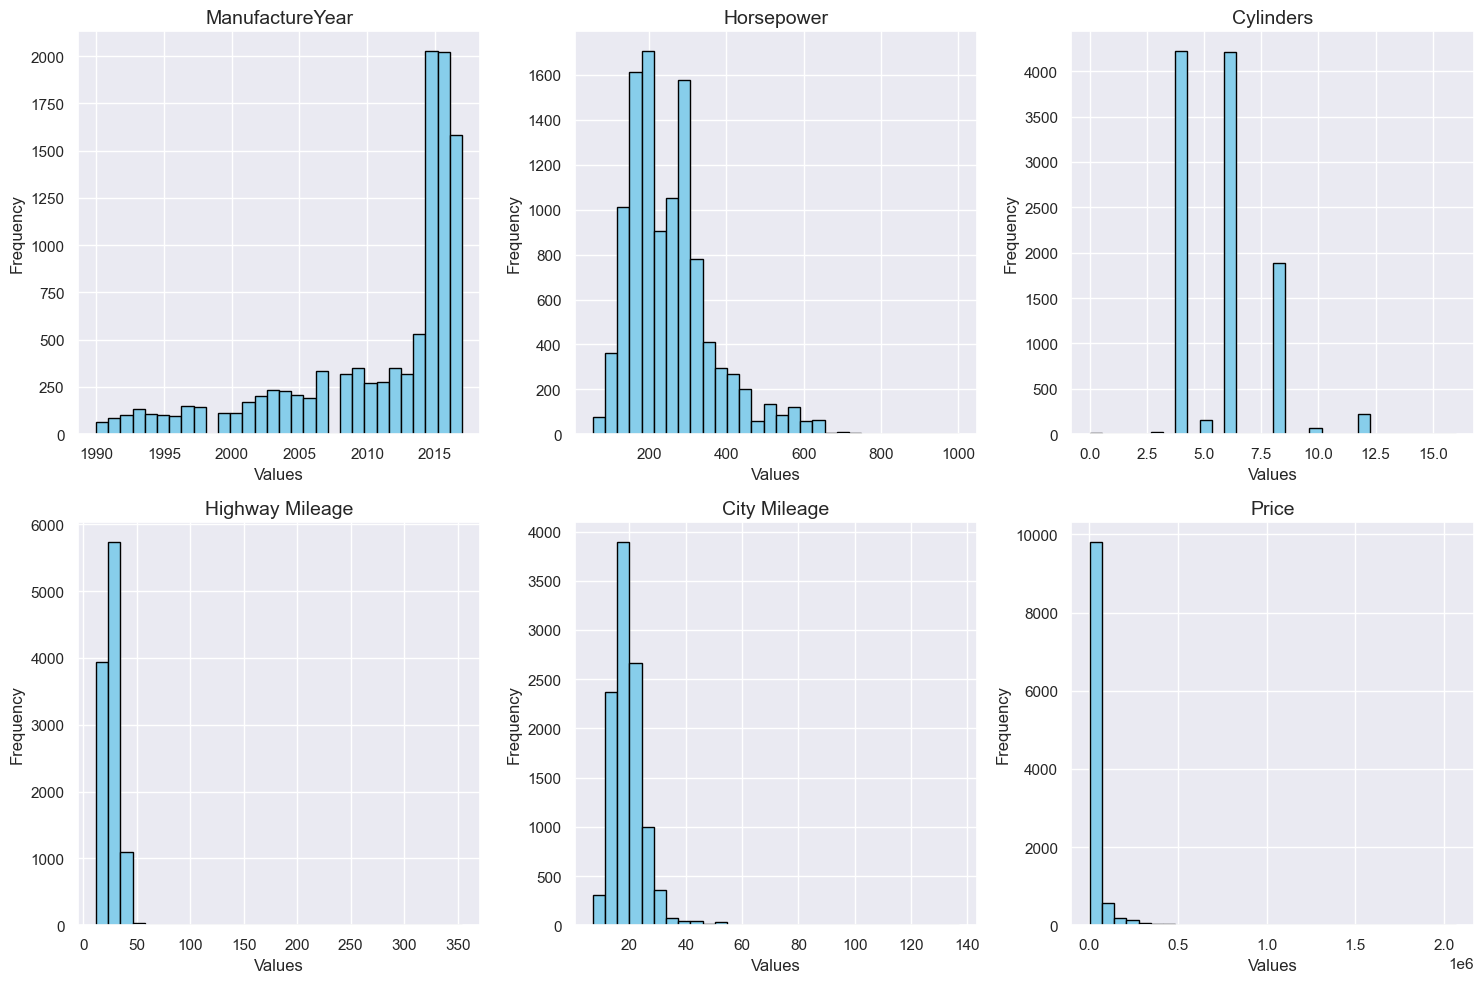

In [53]:
import matplotlib.pyplot as plt

c = 0  # Counter for subplot
plt.figure(figsize=(15, 10))  # Set the overall figure size

for i in l:
    c += 1
    plt.subplot(2, 3, c)  # Create a subplot grid of 2 rows and 3 columns
    plt.hist(df[i].dropna(), bins=30, color='skyblue', edgecolor='black')  # Histogram for the column
    plt.title(i, fontsize=14)  # Add title for each subplot
    plt.xlabel('Values', fontsize=12)  # Add x-axis label
    plt.ylabel('Frequency', fontsize=12)  # Add y-axis label

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


## `Bar Chart Plots`


Plot a histogram depicting the make in X axis and number of cars in y axis. <br>

<Figure size 1200x800 with 0 Axes>

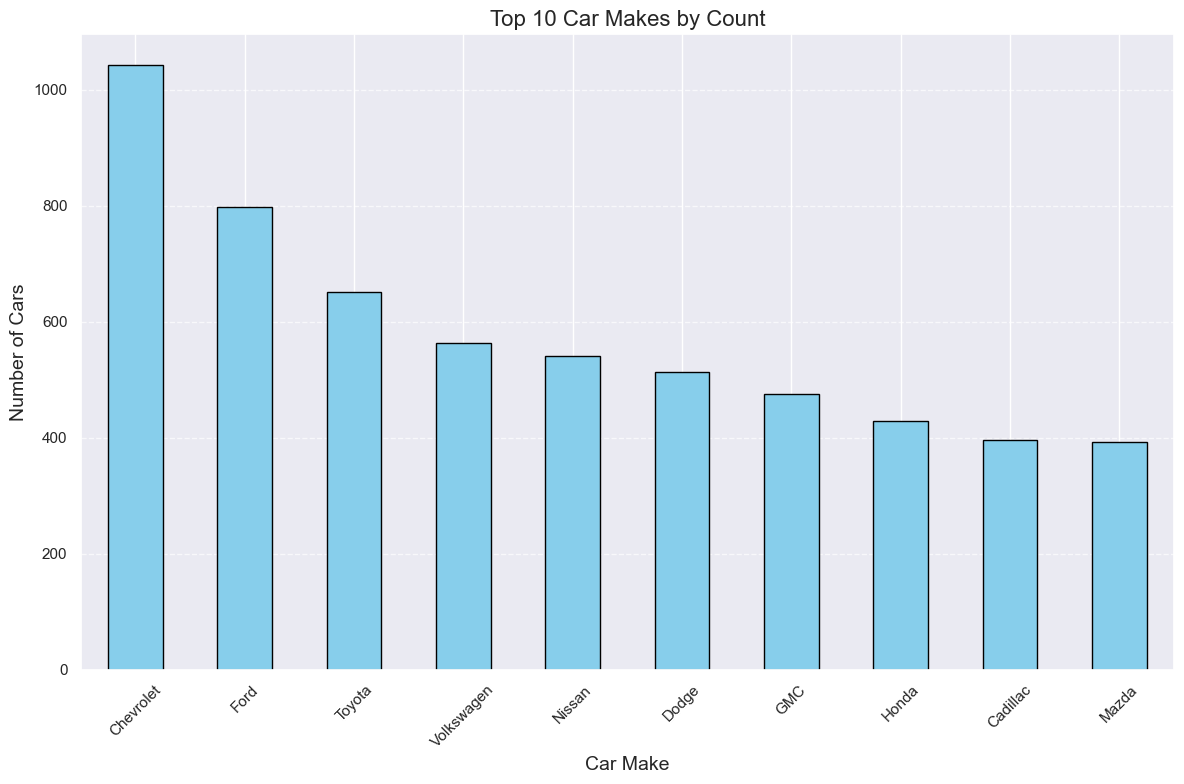

In [60]:
plt.figure(figsize = (12,8))

# use nlargest and then .plot to get bar plot like below output
# Plot Title, X & Y label

import matplotlib.pyplot as plt

# Count the number of cars for each make and take the top 10
top_makes = df['Brand'].value_counts().nlargest(10)

# Plot the bar plot
plt.figure(figsize=(12, 8))
top_makes.plot(kind='bar', color='skyblue', edgecolor='black')

# Add plot title and labels
plt.title('Top 10 Car Makes by Count', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity
plt.tight_layout()
plt.show()

### **`Observation:`**
In this plot we can see that we have plot the bar plot with the cars model and nos. of cars.

### `Count Plot`
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.


 Plot a countplot for a variable Transmission vertically with hue as Drive mode

In [31]:
# plt.figure(figsize=(15,5))

# plot countplot on transmission and drive mode




### **`Observation:`**
In this count plot, We have plot the feature of Transmission with help of hue.<br>
We can see that the the nos of count and the transmission type and automated manual is plotted. Drive mode as been given with help of hue.<br>


# `Visualising Bivariate Distributions`


Bivariate distributions are simply two univariate distributions plotted on x and y axes respectively. They help you observe the relationship between the two variables.




## `Scatter Plots`
Scatterplots are used to find the correlation between two continuos variables.

Using scatterplot find the correlation between 'HP' and 'Price' column of the data. 



In [62]:
df.columns

Index(['Brand', 'CarModel', 'ManufactureYear', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive Type', 'Highway Mileage', 'City Mileage',
       'Price'],
      dtype='object')

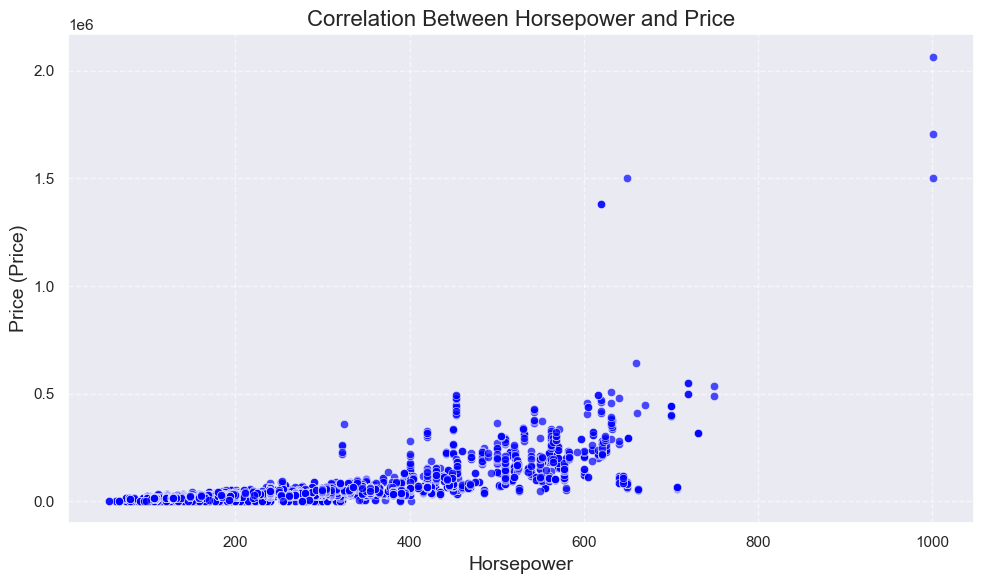

In [64]:
## Your code here - 
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatterplot using seaborn
sns.scatterplot(data=df, x='Horsepower', y='Price', ax=ax, color='blue', alpha=0.7)

# Add labels and title
ax.set_title('Correlation Between Horsepower and Price', fontsize=16)
ax.set_xlabel('Horsepower', fontsize=14)
ax.set_ylabel('Price (Price)', fontsize=14)
plt.grid(linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()
plt.show()



### **`Observation:`**<br>
It is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.<br>
We have plot the scatter plot with x axis as HP and y axis as Price.<br>
The data points between the features should be same either wise it give errors.<br>


## `Plotting Aggregated Values across Categories`


### `Bar Plots - Mean, Median and Count Plots`



Bar plots are used to **display aggregated values** of a variable, rather than entire distributions. This is especially useful when you have a lot of data which is difficult to visualise in a single figure. 

For example, say you want to visualise and *compare the Price across Cylinders*. The ```sns.barplot()``` function can be used to do that.


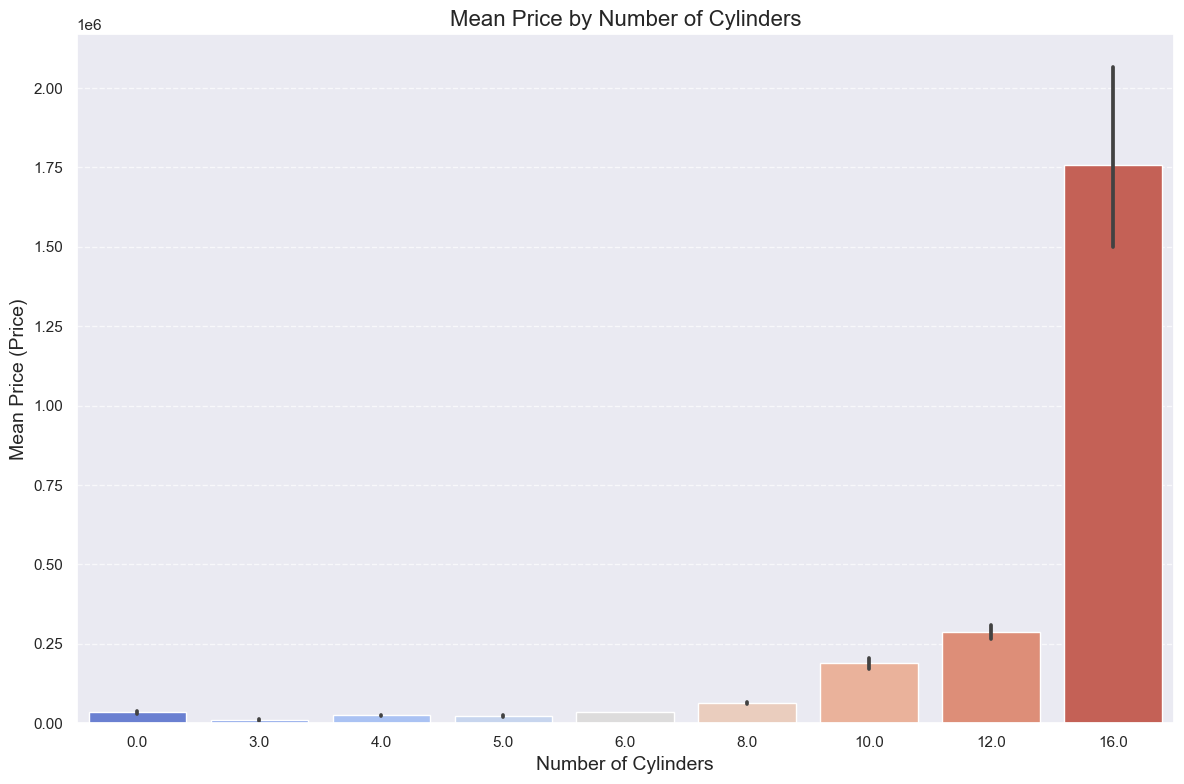

In [65]:
# bar plot with default statistic=mean between Cylinder and Price

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Cylinders', y='Price', palette='coolwarm')

# Add title and axis labels
plt.title('Mean Price by Number of Cylinders', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.ylabel('Mean Price (Price)', fontsize=14)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better clarity
plt.tight_layout()
plt.show()





### **`Observation:`**<br>
By default, seaborn plots the mean value across categories, though you can plot the count, median, sum etc.<br>
Also, barplot computes and shows the confidence interval of the mean as well.



## `When you want to visualise having a large number of categories, it is helpful to plot the categories across the y-axis.`

### `Let's now drill down into Transmission sub categories.`

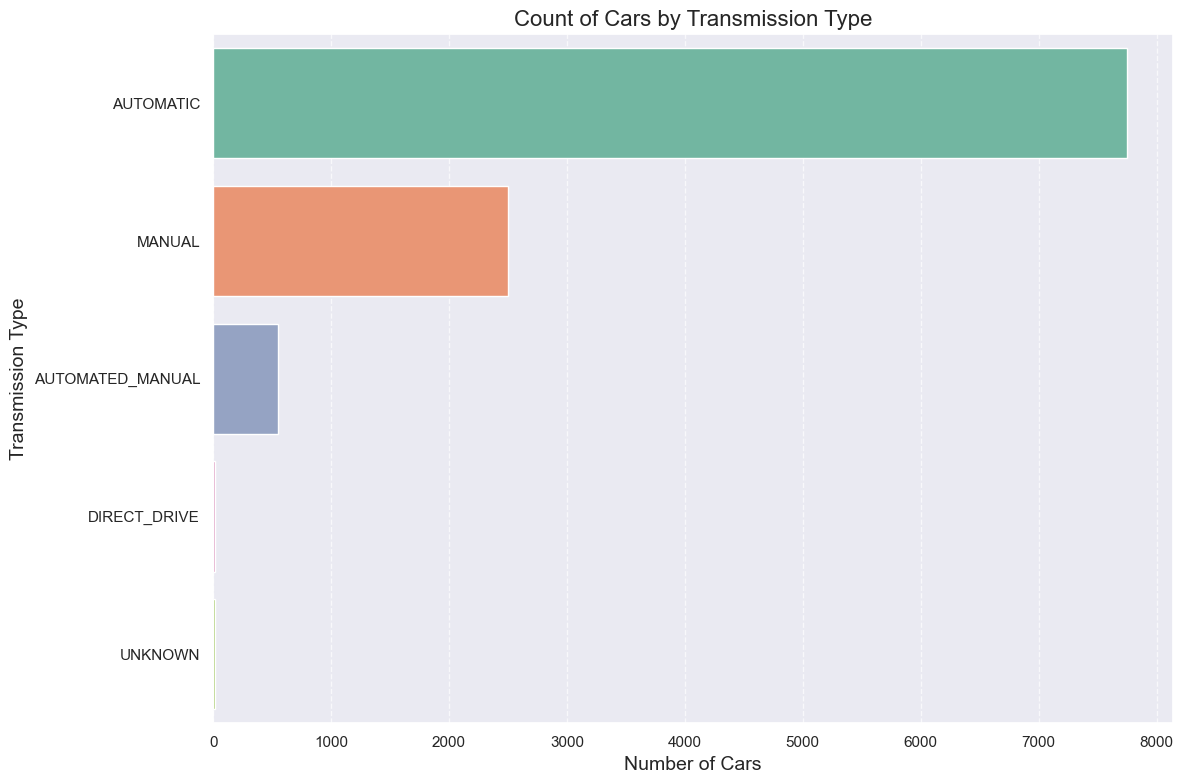

In [66]:
# Plotting categorical variable Transmission across the y-axis
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Transmission', palette='Set2', order=df['Transmission'].value_counts().index)

# Add title and axis labels
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Number of Cars', fontsize=14)
plt.ylabel('Transmission Type', fontsize=14)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



These plots looks beutiful isn't it? In Data Analyst life such charts are there unavoidable friend.:)

# `Multivariate Plots`



## `Heatmaps`


A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information

Using heatmaps plot the correlation between the features present in the dataset.

In [68]:
#find the correlation of features of the data 
corr  = df2.corr()

# print corr
corr

,ManufactureYear,Horsepower,Cylinders,Highway Mileage,City Mileage,Price
ManufactureYear,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
Horsepower,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
Highway Mileage,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
City Mileage,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


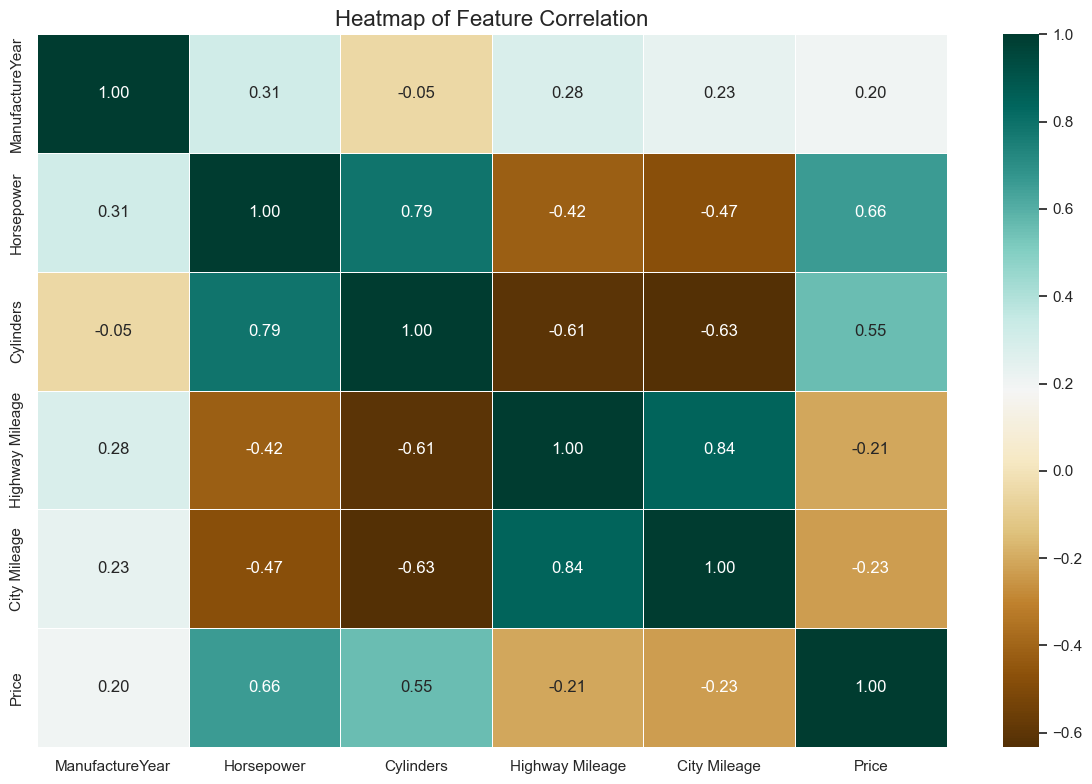

In [70]:
# Using the correlated df, plot the heatmap 
# set cmap = 'BrBG', annot = True - to get the same graph as shown below 
# set size of graph = (12,8)


# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Heatmap of Feature Correlation', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()




### **`Observation:`**<br>
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.


The above heatmap plot shows correlation between various variables in the colored scale of -1 to 1. 
